In [1]:
import  cv2
import tensorflow

In [2]:
#Basic library
import math
import random
import pickle
import itertools
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.signal import resample
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
np.random.seed(4)
import pickle
import keras
#ML library
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,label_ranking_average_precision_score,label_ranking_loss, coverage_error

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error
from sklearn.preprocessing import OneHotEncoder


#DL library
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Input, Flatten, SeparableConv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras import backend as K
from keras.optimizers import adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint


import os


Using TensorFlow backend.


In [3]:
print(os.listdir("D:\\SOHEL RANA\\Files\\Medical Data processing\\heartbeat"))

['mitbih_test.csv', 'mitbih_train.csv', 'ptbdb_abnormal.csv', 'ptbdb_normal.csv']


In [4]:
df = pd.read_csv("D:\\SOHEL RANA\\Files\\Medical Data processing\\heartbeat\\ptbdb_abnormal.csv", header=None)

df2 = pd.read_csv("D:\\SOHEL RANA\\Files\\Medical Data processing\\heartbeat\\ptbdb_normal.csv", header=None)

df3= pd.read_csv("D:\\SOHEL RANA\\Files\\Medical Data processing\\heartbeat\\mitbih_train.csv", header=None)

df = pd.concat([df, df2,df3])




#print(df)
#print(df2)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
df[187].value_counts()

0.0    76517
1.0    12729
4.0     6431
2.0     5788
3.0      641
Name: 187, dtype: int64

In [8]:
M = df.values
X = M[:, :-1]
y = M[:, -1].astype(int)

In [9]:
del df
del df2
del M

In [10]:

C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()

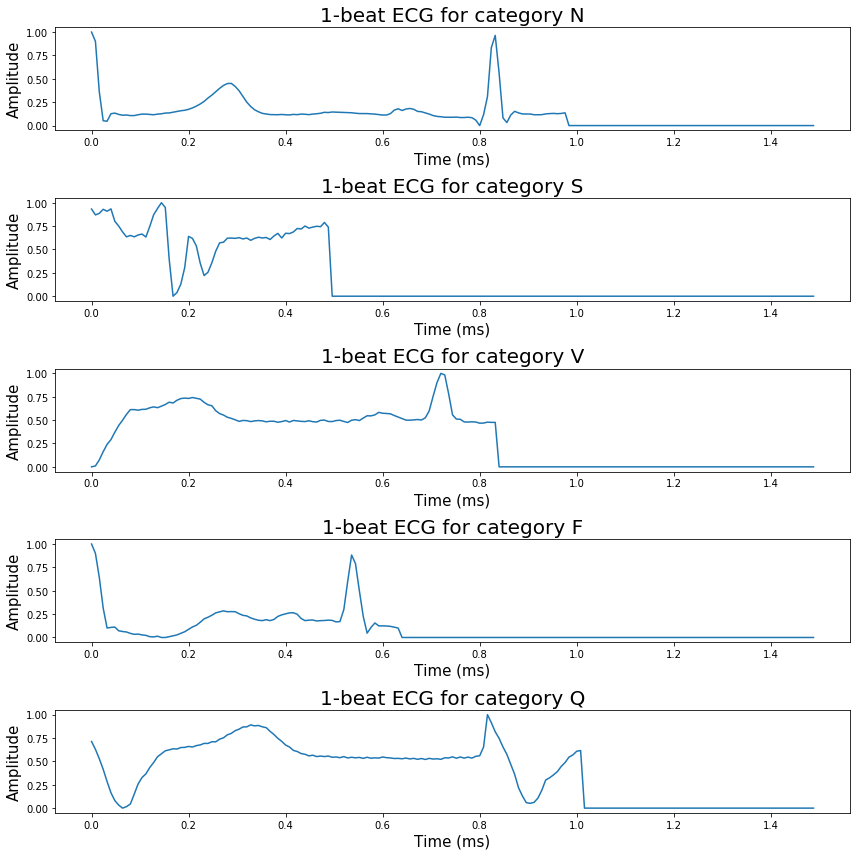

In [11]:
x = np.arange(0, 187)*8/1000

plt.figure(figsize=(12,12))
plt.subplot(5, 1, 1)

plt.plot(x, X[C0, :][0], label="Cat. N")
plt.title("1-beat ECG for category N", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

plt.subplot(5,1, 2)
plt.plot(x, X[C1, :][0], label="Cat. S")
plt.title("1-beat ECG for category S", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

plt.subplot(5,1,3)
plt.plot(x, X[C2, :][0], label="Cat. V")
plt.title("1-beat ECG for category V", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

plt.subplot(5,1, 4)
plt.plot(x, X[C3, :][0], label="Cat. F")
plt.title("1-beat ECG for category F", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

plt.subplot(5,1,5)
plt.plot(x, X[C4, :][0], label="Cat. Q")
plt.title("1-beat ECG for category Q", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
#Data augmentation

In [12]:
def stretch(x):
    l = int(187 * (1 + (random.random()-0.5)/3))
    y = resample(x, l)
    if l < 187:
        y_ = np.zeros(shape=(187, ))
        y_[:l] = y
    else:
        y_ = y[:187]
    return y_

def amplify(x):
    alpha = (random.random()-0.5)
    factor = -alpha*x + (1+alpha)
    return x*factor

def augment(x):
    result = np.zeros(shape= (4, 187))
    for i in range(3):
        if random.random() < 0.33:
            new_y = stretch(x)
        elif random.random() < 0.66:
            new_y = amplify(x)
        else:
            new_y = stretch(x)
            new_y = amplify(new_y)
        result[i, :] = new_y
    return result

      

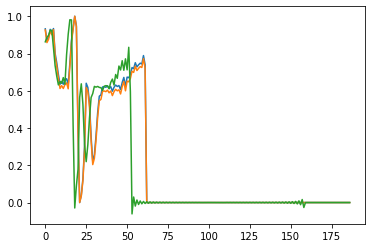

In [13]:
plt.plot(X[0, :])
plt.plot(amplify(X[0, :]))
plt.plot(stretch(X[0, :]))
plt.show()

In [14]:
result = np.apply_along_axis(augment, axis=1, arr=X[C3]).reshape(-1, 187)
classe = np.ones(shape=(result.shape[0],), dtype=int)*3
X = np.vstack([X, result])
y = np.hstack([y, classe])

In [15]:
subC0 = np.random.choice(C0, 800)
subC1 = np.random.choice(C1, 800)
subC2 = np.random.choice(C2, 800)
subC3 = np.random.choice(C3, 800)
subC4 = np.random.choice(C4, 800)


In [16]:
X_test = np.vstack([X[subC0], X[subC1], X[subC2], X[subC3], X[subC4]])
y_test = np.hstack([y[subC0], y[subC1], y[subC2], y[subC3], y[subC4]])

X_train = np.delete(X, [subC0, subC1, subC2, subC3, subC4], axis=0)
y_train = np.delete(y, [subC0, subC1, subC2, subC3, subC4], axis=0)

X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

del X
del y
X_train = np.expand_dims(X_train, 2)
X_test = np.expand_dims(X_test, 2)

In [17]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (101136, 187, 1)
y_train (101136,)
X_test (4000, 187, 1)
y_test (4000,)


In [18]:
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train.reshape(-1,1))
y_test = ohe.transform(y_test.reshape(-1,1))

C:\Users\Fabber_Sohel\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [19]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (101136, 187, 1)
y_train (101136, 5)
X_test (4000, 187, 1)
y_test (4000, 5)


In [20]:
n_obs, feature, depth = X_train.shape
batch_size =1000

In [21]:
def build_model():
    input_img = Input(shape=(feature, depth), name='ImageInput')
    x = Conv1D(32, 3, activation='relu', padding='same', name='Conv1_1')(input_img)
    x = Conv1D(32, 3, activation='relu', padding='same', name='Conv1_2')(x)
    x = MaxPooling1D(2, name='pool1')(x)
    
    x = SeparableConv1D(32, 3, activation='relu', padding='same', name='Conv2_1')(x)
    x = SeparableConv1D(32, 3, activation='relu', padding='same', name='Conv2_2')(x)
    x = MaxPooling1D(2, name='pool2')(x)
    
    x = SeparableConv1D(64, 3, activation='relu', padding='same', name='Conv3_1')(x)
    x = BatchNormalization(name='bn1')(x)
    x = SeparableConv1D(64, 3, activation='relu', padding='same', name='Conv3_2')(x)
    x = BatchNormalization(name='bn2')(x)
    
    x = SeparableConv1D(64, 3, activation='relu', padding='same', name='Conv3_3')(x)
    x = MaxPooling1D(2, name='pool3')(x)
    
    x = Flatten(name='flatten')(x)
    x = Dense(128, activation='relu', name='fc1')(x)
    x = Dropout(0.6, name='dropout1')(x)
    x = Dense(128, activation='relu', name='fc2')(x)
    x = Dropout(0.5, name='dropout2')(x)
    x = Dense(5, activation='softmax', name='fc3')(x)
    
    model = Model(inputs=input_img, outputs=x)
    return model

In [22]:
model =  build_model()
#model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
def exp_decay(epoch):
    initial_lrate = 0.001
    k = 0.75
    t = n_obs//(10000 * batch_size)  # every epoch we do n_obs/batch_size iteration
    lrate = initial_lrate * math.exp(-k*t)
    return lrate

lrate = LearningRateScheduler(exp_decay)

In [25]:
import keras
adam = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

NameError: name 'Adam' is not defined

In [57]:
history = model.fit(X_train, y_train, 
                    epochs=80, 
                    batch_size=batch_size, 
                    verbose=2, 
                    validation_data=(X_test, y_test), 
                    callbacks=[lrate])

Instructions for updating:
Use tf.cast instead.
Train on 101136 samples, validate on 4000 samples
Epoch 1/80
 - 12s - loss: 0.5911 - acc: 0.8083 - val_loss: 0.8517 - val_acc: 0.6338
Epoch 2/80
 - 6s - loss: 0.3237 - acc: 0.8851 - val_loss: 0.5119 - val_acc: 0.8307
Epoch 3/80
 - 6s - loss: 0.2308 - acc: 0.9229 - val_loss: 0.6439 - val_acc: 0.8140
Epoch 4/80
 - 7s - loss: 0.1851 - acc: 0.9401 - val_loss: 0.3084 - val_acc: 0.8910
Epoch 5/80
 - 6s - loss: 0.1578 - acc: 0.9491 - val_loss: 0.5161 - val_acc: 0.8252
Epoch 6/80
 - 7s - loss: 0.1365 - acc: 0.9563 - val_loss: 0.7815 - val_acc: 0.7792
Epoch 7/80
 - 7s - loss: 0.1258 - acc: 0.9603 - val_loss: 0.2818 - val_acc: 0.8995
Epoch 8/80
 - 7s - loss: 0.1124 - acc: 0.9645 - val_loss: 0.3969 - val_acc: 0.8602
Epoch 9/80
 - 7s - loss: 0.1046 - acc: 0.9667 - val_loss: 0.2854 - val_acc: 0.9083
Epoch 10/80
 - 7s - loss: 0.0953 - acc: 0.9697 - val_loss: 0.3181 - val_acc: 0.9040
Epoch 11/80
 - 7s - loss: 0.0905 - acc: 0.9709 - val_loss: 0.3062 - va

In [58]:
# Get predictions
preds = model.predict(X_test, batch_size=batch_size)
preds = np.argmax(preds, axis=-1)

# Original labels
orig_test_labels = np.argmax(y_test, axis=-1)

print(orig_test_labels.shape)
print(preds.shape)



(4000, 1)
(4000,)


In [59]:
Result=score = model.evaluate(X_test,y_test,verbose=2)

print('Test accuracy:', score[1])

print('Test loss:', score[0])


Test accuracy: 0.94175
Test loss: 0.32418631260609254


<Figure size 432x288 with 0 Axes>

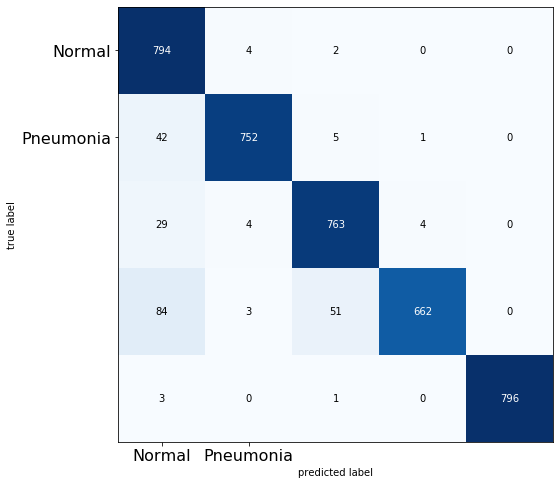

In [60]:
# Get the confusion matrix
cm  = confusion_matrix(orig_test_labels, preds)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

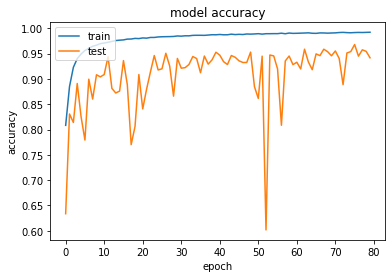

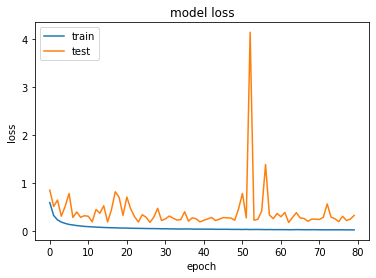

In [61]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()